In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies-dataset-2023-930k-movies/TMDB_movie_dataset_v11.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/kaggle/input/tmdb-movies-dataset-2023-930k-movies/TMDB_movie_dataset_v11.csv')

In [4]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [6]:
df.shape

(952372, 23)

In [7]:
df.isnull().sum()

id                           0
title                       11
vote_average                 0
vote_count                   0
status                       0
release_date             90382
revenue                      0
runtime                      0
adult                        0
backdrop_path           674048
budget                       0
homepage                848571
imdb_id                 394569
original_language            0
original_title              11
overview                166807
popularity                   0
poster_path             247423
tagline                 814249
genres                  337987
production_companies    489270
production_countries    373121
spoken_languages        366629
dtype: int64

In [8]:
# Assuming 'release_date' is in a string format
df['release_date'] = pd.to_datetime(df['release_date'])

most_recent_release_date = df['release_date'].max()
most_outdated_release=df['release_date'].min()
most_outdated_release

Timestamp('1865-01-01 00:00:00')

In [9]:
rd = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors = 'coerce')
imaginary_movies = df[rd.isna()]
df = df.drop(imaginary_movies.index)

In [10]:
imaginary_movies

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
15510,733668,Return,6.171,129,Released,NaT,0,18,False,NaN,...,hy,Return,Eyüp decides to cross mount Ararat looking for...,3.563,NaN,NaN,NaN,NaN,NaN,"Armenian, Kurdish"
15866,1091834,Return,6.980,124,Released,NaT,0,92,False,NaN,...,en,Return,RETURN tells the story of a retired Green Bere...,4.444,NaN,A retired Green Beret returns to Vietnam with ...,NaN,NaN,NaN,NaN
30315,614840,Box,5.000,44,Released,NaT,5,90,False,NaN,...,en,Box,"A group of friends try to defeat an evil king,...",1.553,NaN,Box Rocks!,NaN,NaN,NaN,NaN
33845,1043332,I am,9.338,37,Released,NaT,49110,88,False,NaN,...,ru,Я,A young man who writes avant-garde plays in th...,3.968,/oQI0E0C8ERiKyUxrIXKLkKm2PXX.jpg,NaN,NaN,NaN,NaN,Russian
33852,823711,kino-react,6.200,37,Released,NaT,0,0,False,NaN,...,en,kino-react,test api requests for kinosakartvelo movie web...,1.307,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952337,640833,Fyra fack för förändring - Mål,0.000,0,Released,NaT,0,0,False,/vuUv78gLg7mMwuK2k0tx0JsECpw.jpg,...,sv,Fyra fack för förändring - Mål,NaN,0.600,/urllHKa8MyhgQ6am8emW5tmq46V.jpg,NaN,NaN,NaN,NaN,Swedish
952338,640834,Fyra fack för förändring - Metod,0.000,0,Released,NaT,0,0,False,/vuUv78gLg7mMwuK2k0tx0JsECpw.jpg,...,sv,Fyra fack för förändring - Metod,NaN,0.600,/8bs7Wi1dw1DzeARtmf0Jpzvrkme.jpg,NaN,NaN,NaN,NaN,Swedish
952339,640835,Fyra fack för förändring - Mitt Ansvar,0.000,0,Released,NaT,0,0,False,/vuUv78gLg7mMwuK2k0tx0JsECpw.jpg,...,sv,Fyra fack för förändring - Mitt Ansvar,NaN,0.600,/b6yp4D6QrIrCNV907lLB9VOGfLP.jpg,NaN,NaN,NaN,NaN,NaN
952340,640836,Fyra fack för förändring - Möjligt,0.000,0,Released,NaT,0,0,False,/vuUv78gLg7mMwuK2k0tx0JsECpw.jpg,...,sv,Fyra fack för förändring - Möjligt,NaN,0.600,/rj7hehzbgOgn6kKsIOC3Jb0OYag.jpg,NaN,NaN,NaN,NaN,Swedish


In [11]:
#no_imag_df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

import datetime
df[df['release_date'] < np.datetime64('1881')].__len__()

27

Note : we will consider the movies after the date 1891-01-01 on part that the world had advanced in filming technologies before the Great War however film had not propogated far by then and things before then were heavily reliant on non-celluloid films

In [12]:
historic_films = df[df['release_date'] < np.datetime64('1891')]
df = df.drop(historic_films.index)

joke_movies = df[df['release_date'] > np.datetime64('2030')]

Removing joke movies

In [13]:
updated_df= df.drop(joke_movies.index)

In [14]:
updated_df.shape

(861939, 23)

In [15]:
updated_df.isnull().sum()

id                           0
title                        4
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
backdrop_path           590449
budget                       0
homepage                767287
imdb_id                 329580
original_language            0
original_title               4
overview                141414
popularity                   0
poster_path             195422
tagline                 734835
genres                  273614
production_companies    411816
production_countries    298401
spoken_languages        298345
dtype: int64

In [16]:
#lst=['production_companies','production_countries','backdrop_path','homepage']
#updated_df.drop(lst,axis=1)
lst=['release_date','runtime','adult','backdrop_path','original_language','original_title','poster_path','production_companies','production_countries','spoken_languages']
updated_df.drop(lst,axis=1,inplace=True)

In [17]:
updated_df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'revenue',
       'budget', 'homepage', 'imdb_id', 'overview', 'popularity', 'tagline',
       'genres'],
      dtype='object')

In [18]:
updated_df.isnull().sum()

id                   0
title                4
vote_average         0
vote_count           0
status               0
revenue              0
budget               0
homepage        767287
imdb_id         329580
overview        141414
popularity           0
tagline         734835
genres          273614
dtype: int64

In [19]:
#df['overview']=df['overview'].apply(lambda x: x.split())
updated_df.dtypes
#updated_df['overview'][0]

id                int64
title            object
vote_average    float64
vote_count        int64
status           object
revenue           int64
budget            int64
homepage         object
imdb_id          object
overview         object
popularity      float64
tagline          object
genres           object
dtype: object

In [20]:
updated_df['genres']=updated_df['genres'].astype(str)

In [21]:
updated_df['genres'].fillna(' ',inplace=True)

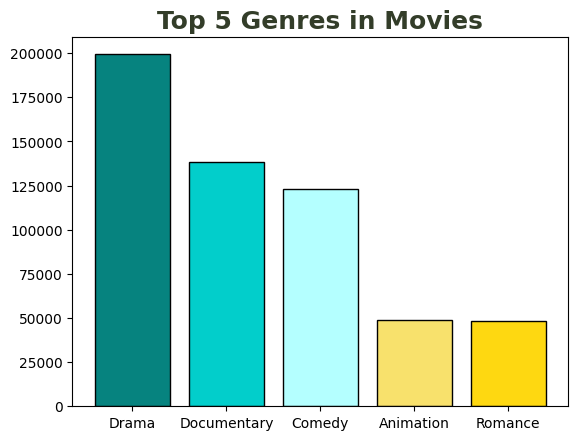

In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
genres_list = []
for i in df['genres']:
    if isinstance(i, str): 
        genres_list.extend(i.split(', '))
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']
plt.bar(df_plot['genre'], df_plot['total'], color=colors, edgecolor='black')
plt.title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
plt.show()


([<matplotlib.patches.Wedge at 0x7d21fdd84ee0>,
 [Text(-1.0025692759713245, -0.4526089337146741, 'Drama'),
  Text(0.753901907041902, -0.8010192972448189, 'Documentary'),
  Text(0.8707021608131216, 0.6722185263404759, 'Comedy'),
  Text(-0.06092478292403597, 1.0983115090108357, 'Animation'),
  Text(-0.6226191142974252, 0.9068326408502784, 'Romance')],
 [Text(-0.5468559687116316, -0.24687760020800403, '35.7%'),
  Text(0.41121922202285555, -0.4369196166789921, '24.8%'),
  Text(0.4749284513526117, 0.3666646507311686, '22.1%'),
  Text(-0.033231699776746886, 0.5990790049150013, '8.8%'),
  Text(-0.3396104259804137, 0.4946359859183336, '8.6%')])

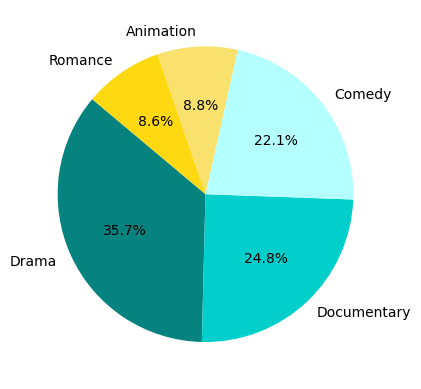

In [23]:
plt.pie(df_plot['total'], labels=df_plot['genre'], colors=colors, autopct='%1.1f%%', startangle=140)

/tmp/ipykernel_32/2717242864.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_plot, x='genre', y=updated_df[y], ax=axes[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
/tmp/ipykernel_32/2717242864.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_plot, x='genre', y=updated_df[y], ax=axes[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])


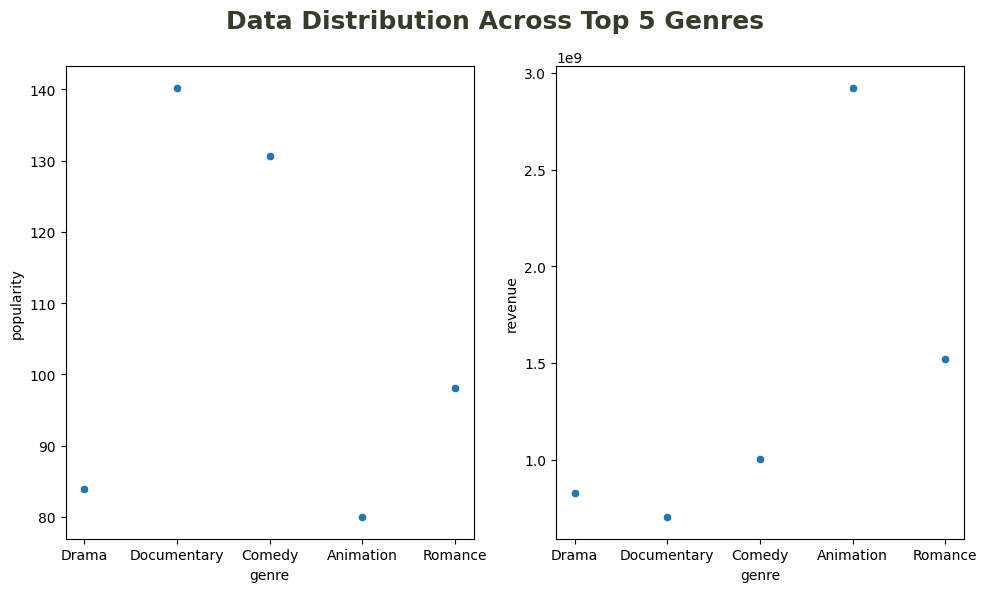

In [24]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')

# Iterate only over 'popularity' and 'revenue'
for i, y in enumerate(['popularity', 'revenue']):
    sns.scatterplot(data=df_plot, x='genre', y=updated_df[y], ax=axes[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()



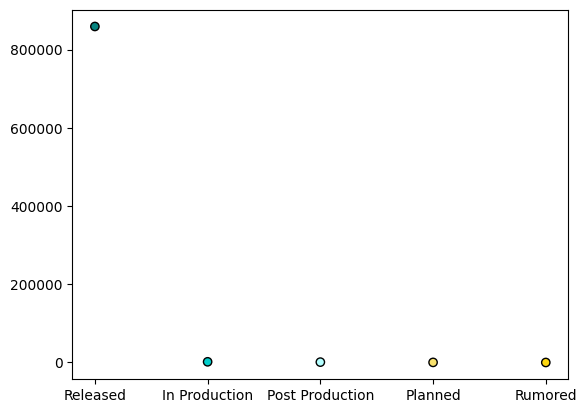

In [25]:
status_list = []
for i in df['status']:
    if isinstance(i, str): 
        status_list.extend(i.split(', '))
s_plot = pd.DataFrame(Counter(status_list).most_common(5), columns=['status', 'total'])
s_plot
plt.scatter(s_plot['status'], s_plot['total'], color=colors, edgecolor='black')

In [26]:
df_plot.columns

Index(['genre', 'total'], dtype='object')

<Axes: >

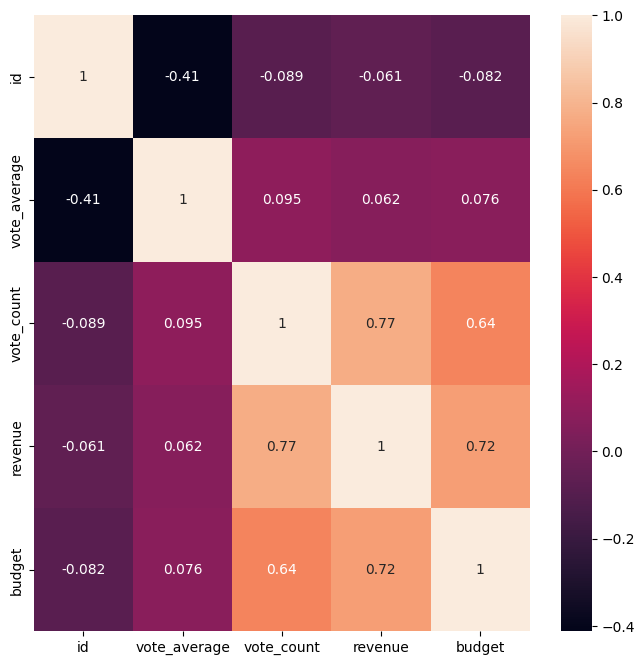

In [27]:
lst=['id','vote_average','vote_count','revenue','budget']
plt.figure(figsize=(8,8))
sns.heatmap(updated_df[lst].corr(),annot=True)


In [28]:
updated_df.shape

(861939, 13)

In [29]:
updated_df['combined']=df['overview']+df['tagline']+df['genres']

In [30]:
updated_df.drop(['tagline','genres','overview'],inplace=True,axis=1)

In [31]:
updated_df['combined']=updated_df['combined'].astype(str)

In [32]:
updated_df['combined'].replace('nan',np.nan,inplace=True)
updated_df.dropna(subset=['combined'],inplace=True)

In [33]:
updated_df.shape

(106984, 11)

In [34]:
import re
def clean_text(x):
    x=x.lower()
    return re.sub('[^A-Za-z0-9]+', ' ', x)
updated_df['combined']=updated_df['combined'].apply(clean_text)


In [35]:
updated_df['combined'].any()

True

REMOVING PUNCTUTAIONS

In [36]:
import re
import string
def remove_punc(text):
    punc=(string.punctuation)
    if isinstance(text, str):
        text = text.translate(str.maketrans('', '', punc))
    return text
updated_df['combined']=updated_df['combined'].apply(remove_punc)

REMOVING STOP WORDS

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
updated_df['combined'] = updated_df['combined'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


STEMMINNG

In [38]:
from nltk.stem import PorterStemmer
nltk.download('punkt') 
stemmer = PorterStemmer()
def stem_text(text):
    words = nltk.word_tokenize(text)  # Tokenize the text into words
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
updated_df['combined']=updated_df['combined'].apply(stem_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
updated_df

,id,title,vote_average,vote_count,status,revenue,budget,homepage,imdb_id,popularity,combined
0,27205,Inception,8.364,34495,Released,825532764,160000000,https://www.warnerbros.com/movies/inception,tt1375666,83.952,cobb skill thief commit corpor espionag infilt...
1,157336,Interstellar,8.417,32571,Released,701729206,165000000,http://www.interstellarmovie.net/,tt0816692,140.241,adventur group explor make use newli discov wo...
2,155,The Dark Knight,8.512,30619,Released,1004558444,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,130.643,batman rais stake war crime help lt jim gordon...
3,19995,Avatar,7.573,29815,Released,2923706026,237000000,https://www.avatar.com/movies/avatar,tt0499549,79.932,22nd centuri parapleg marin dispatch moon pand...
4,24428,The Avengers,7.710,29166,Released,1518815515,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,98.082,unexpect enemi emerg threaten global safeti se...
...,...,...,...,...,...,...,...,...,...,...,...
952273,640946,The Orbits of Water (Liquid Version),0.000,0,Released,0,100000,http://www.lumefilmes.art.br,tt5001208,0.600,orbit water water version fabl famili wait ret...
952281,640928,Deadlock,0.000,0,Released,0,0,NaN,tt0312602,0.625,govern secur defens plant infiltr group mercen...
952309,640786,R.I.P. - Bis zum Morgengrauen,0.000,0,Released,0,0,http://www.rip-independent.de/rip-till-dawn.html,NaN,0.600,super 8 shot ultra low budget horror movi 1996...
952335,640839,Net Skirts 19.0,0.000,0,Released,0,0,NaN,tt11147696,0.600,two hour search net fun girl hottest girl sedu...


In [40]:
#applying weighted_average to find out collabrative filtering
R = df['vote_average']
v = df['vote_count']
m = df['vote_count'].quantile(0.8)
C = df['vote_average'].mean()

updated_df['weighted_average'] = (R*v + C*m)/(v+m)

#applying weighted_average to find out collabrative filtering

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(updated_df[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

weighted_df.index = updated_df['title']

In [42]:
weighted_df

,popularity,weighted_average
title,,
Inception,0.028037,0.863592
Interstellar,0.046835,0.870133
The Dark Knight,0.043630,0.881859
Avatar,0.026694,0.765913
The Avengers,0.032756,0.782827
...,...,...
The Orbits of Water (Liquid Version),0.000200,0.124217
Deadlock,0.000209,0.124217
R.I.P. - Bis zum Morgengrauen,0.000200,0.124217


People watch a movie not just because they see a good rating for that movie, but also because of the hype of certain movie. So, in this case, put popularity into a consideration is a wise choice

Let's take 40% weight for weigthed average and 60% weight for popularity considering people don't want to miss a hype movie even the reviews and ratings are poor. You can play around with the number. Next up, we create a new column called score which stores the result

In [43]:
weighted_df['score'] = weighted_df['weighted_average']*0.4 + weighted_df['popularity'].astype('float64')*0.6

In [44]:
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)
weighted_df_sorted.head()
weighted_df.loc['Queerama']

popularity          0.000370
weighted_average    0.395785
score               0.158536
Name: Queerama, dtype: float64